### Python 实现 KDJ 的超买和超卖信息提示
KDJ 的基本使用方法：
K 线是快速确认线——数值在 90 以上为超买，数值在 10 以下为超卖；
D 线是慢速主干线——数值在 80 以上为超买，数值在 20 以下为超卖；
J 线为方向敏感线，当 J 值大于 100，特别是连续 5 天以上，股价至少会形成短期头部，
反之 J 值小于 0 时，特别是连续数天以上，股价至少会形成短期底部。

In [1]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
 code = 'sh.601100'
 startdate = '2021-06-24'
 enddate = '2022-06-24'

In [49]:
    login_result = bs.login(user_id='anonymous', password='123456')
    print(login_result.error_msg)
    # 获取股票日K线数据
    rs = bs.query_history_k_data(code, "date,code,high,close,low,tradeStatus", start_date=startdate, end_date=enddate,
                                 frequency="d", adjustflag="3")
    # 打印结果集
    result_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        result_list.append(rs.get_row_data())
    df_init = pd.DataFrame(result_list, columns=rs.fields)
    # 剔除停盘数据
    df_status = df_init[df_init['tradeStatus'] == '1']
    df_status

login success!
success


,date,code,high,close,low,tradeStatus
0,2021-06-24,sh.601100,77.4900,74.1000,73.0800,1
1,2021-06-25,sh.601100,81.5100,81.5100,73.8000,1
2,2021-06-28,sh.601100,85.4000,84.7000,81.6500,1
3,2021-06-29,sh.601100,87.0300,86.0100,83.9900,1
4,2021-06-30,sh.601100,86.3700,85.9200,84.2800,1
...,...,...,...,...,...,...
238,2022-06-20,sh.601100,57.9200,57.4300,56.0600,1
239,2022-06-21,sh.601100,57.7000,56.5200,55.8500,1
240,2022-06-22,sh.601100,56.9000,55.1900,55.1200,1
241,2022-06-23,sh.601100,58.1800,58.0000,55.2500,1


In [50]:
    low = df_status['low'].astype(float)
    del df_status['low']
    df_status

,date,code,high,close,tradeStatus
0,2021-06-24,sh.601100,77.4900,74.1000,1
1,2021-06-25,sh.601100,81.5100,81.5100,1
2,2021-06-28,sh.601100,85.4000,84.7000,1
3,2021-06-29,sh.601100,87.0300,86.0100,1
4,2021-06-30,sh.601100,86.3700,85.9200,1
...,...,...,...,...,...
238,2022-06-20,sh.601100,57.9200,57.4300,1
239,2022-06-21,sh.601100,57.7000,56.5200,1
240,2022-06-22,sh.601100,56.9000,55.1900,1
241,2022-06-23,sh.601100,58.1800,58.0000,1


In [51]:
    df_status.insert(0, 'low', low)
    df_status

,low,date,code,high,close,tradeStatus
0,73.08,2021-06-24,sh.601100,77.4900,74.1000,1
1,73.80,2021-06-25,sh.601100,81.5100,81.5100,1
2,81.65,2021-06-28,sh.601100,85.4000,84.7000,1
3,83.99,2021-06-29,sh.601100,87.0300,86.0100,1
4,84.28,2021-06-30,sh.601100,86.3700,85.9200,1
...,...,...,...,...,...,...
238,56.06,2022-06-20,sh.601100,57.9200,57.4300,1
239,55.85,2022-06-21,sh.601100,57.7000,56.5200,1
240,55.12,2022-06-22,sh.601100,56.9000,55.1900,1
241,55.25,2022-06-23,sh.601100,58.1800,58.0000,1


In [52]:
    high = df_status['high'].astype(float)
    del df_status['high']
    df_status.insert(0, 'high', high)
    close = df_status['close'].astype(float)
    del df_status['close']
    df_status.insert(0, 'close', close)

In [63]:
df_status.head(15)

,close,high,low,date,code,tradeStatus
0,74.10,77.49,73.08,2021-06-24,sh.601100,1
1,81.51,81.51,73.80,2021-06-25,sh.601100,1
2,84.70,85.40,81.65,2021-06-28,sh.601100,1
3,86.01,87.03,83.99,2021-06-29,sh.601100,1
4,85.92,86.37,84.28,2021-06-30,sh.601100,1
5,87.89,89.40,85.58,2021-07-01,sh.601100,1
6,86.13,87.00,85.28,2021-07-02,sh.601100,1
7,85.25,86.09,83.90,2021-07-05,sh.601100,1
8,85.66,87.53,84.21,2021-07-06,sh.601100,1
9,85.32,86.10,84.22,2021-07-07,sh.601100,1


In [64]:
    # 计算KDJ指标,前9个数据为空
    low_list = df_status['low'].rolling(9).min()
    high_list = df_status['high'].rolling(window=9).max()
    print(low_list.head(15))
    print(high_list.head(15))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8     73.08
9     73.80
10    81.65
11    83.56
12    83.56
13    83.56
14    83.56
Name: low, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8     89.40
9     89.40
10    89.40
11    89.40
12    91.27
13    91.27
14    93.14
Name: high, dtype: float64


In [95]:
    rsv = (df_status['close'] - low_list) / (high_list - low_list) * 100
    df_data = pd.DataFrame()
    type(df_data)
    rsv.head(10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8    77.083333
9    73.846154
dtype: float64

In [96]:
    df_data['RSV'] = rsv
    df_data['K'] = rsv.ewm(com=2).mean()
    df_data['D'] = df_data['K'].ewm(com=2).mean()
    df_data['J'] = 3 * df_data['K'] - 2 * df_data['D']
    df_data.index = df_status['date'].values
    df_data.index.name = 'date'
    #df_data['RSV'] = rsv
    df_data.head(15)

,RSV,K,D,J
date,,,,
2021-06-24,NaN,NaN,NaN,NaN
2021-06-25,NaN,NaN,NaN,NaN
2021-06-28,NaN,NaN,NaN,NaN
2021-06-29,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN
2021-07-02,NaN,NaN,NaN,NaN
2021-07-05,NaN,NaN,NaN,NaN
2021-07-06,77.083333,77.083333,77.083333,77.083333


In [97]:
    # 删除空数据
    df_data = df_data.dropna()
    df_data

,RSV,K,D,J
date,,,,
2021-07-06,77.083333,77.083333,77.083333,77.083333
2021-07-07,73.846154,75.141026,75.917949,73.587179
2021-07-08,60.516129,68.213443,72.268446,60.103437
2021-07-09,58.219178,64.061979,68.859606,54.466726
2021-07-12,95.719844,76.214998,71.683240,85.278515
...,...,...,...,...
2022-06-20,57.765957,61.470636,67.537965,49.335978
2022-06-21,48.085106,57.008793,64.028241,42.969896
2022-06-22,32.056893,48.691493,58.915992,28.242495


In [100]:
kdj_position = df_data['K'] > df_data['D']
kdj_position.head(20)

date
2021-07-06    False
2021-07-07    False
2021-07-08    False
2021-07-09    False
2021-07-12     True
2021-07-13     True
2021-07-14     True
2021-07-15     True
2021-07-16     True
2021-07-19     True
2021-07-20     True
2021-07-21    False
2021-07-22     True
2021-07-23     True
2021-07-26    False
2021-07-27    False
2021-07-28    False
2021-07-29    False
2021-07-30    False
2021-08-02     True
dtype: bool

In [104]:
kdj_position.shift(1).head(21)

date
2021-07-06      NaN
2021-07-07    False
2021-07-08    False
2021-07-09    False
2021-07-12    False
2021-07-13     True
2021-07-14     True
2021-07-15     True
2021-07-16     True
2021-07-19     True
2021-07-20     True
2021-07-21     True
2021-07-22    False
2021-07-23     True
2021-07-26     True
2021-07-27    False
2021-07-28    False
2021-07-29    False
2021-07-30    False
2021-08-02    False
2021-08-03     True
dtype: object

In [105]:
df_data.loc[kdj_position[(kdj_position == True) & (kdj_position.shift() == False)].index, 'KDJ_金叉死叉'] = '金叉'
df_data.loc[kdj_position[(kdj_position == False) & (kdj_position.shift() == True)].index, 'KDJ_金叉死叉'] = '死叉'
df_data.head(20)

,RSV,K,D,J,KDJ_金叉死叉
date,,,,,
2021-07-06,77.083333,77.083333,77.083333,77.083333,NaN
2021-07-07,73.846154,75.141026,75.917949,73.587179,NaN
2021-07-08,60.516129,68.213443,72.268446,60.103437,NaN
2021-07-09,58.219178,64.061979,68.859606,54.466726,NaN
2021-07-12,95.719844,76.214998,71.683240,85.278515,金叉
2021-07-13,65.369650,72.251961,71.891058,72.973767,NaN
2021-07-14,88.413361,77.973992,74.044754,85.832468,NaN
2021-07-15,97.382602,84.706209,77.742867,98.632894,NaN
2021-07-16,81.179775,83.499338,79.712936,91.072140,NaN


In [106]:
def computeKDJ(code, startdate, enddate):
    login_result = bs.login(user_id='anonymous', password='123456')
    print(login_result.error_msg)
    # 获取股票日K线数据
    rs = bs.query_history_k_data(code, "date,code,high,close,low,tradeStatus", start_date=startdate, end_date=enddate,
                                 frequency="d", adjustflag="3")
    # 打印结果集
    result_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        result_list.append(rs.get_row_data())
    df_init = pd.DataFrame(result_list, columns=rs.fields)
    # 剔除停盘数据
    df_status = df_init[df_init['tradeStatus'] == '1']
    low = df_status['low'].astype(float)
    del df_status['low']
    df_status.insert(0, 'low', low)
    high = df_status['high'].astype(float)
    del df_status['high']
    df_status.insert(0, 'high', high)
    close = df_status['close'].astype(float)
    del df_status['close']
    df_status.insert(0, 'close', close)
    # 计算KDJ指标,前9个数据为空
    low_list = df_status['low'].rolling(window=9).min()
    high_list = df_status['high'].rolling(window=9).max()
    rsv = (df_status['close'] - low_list) / (high_list - low_list) * 100
    df_data = pd.DataFrame()
    df_data['K'] = rsv.ewm(com=2).mean()
    df_data['D'] = df_data['K'].ewm(com=2).mean()
    df_data['J'] = 3 * df_data['K'] - 2 * df_data['D']
    df_data.index = df_status['date'].values
    df_data.index.name = 'date'
    # 删除空数据
    df_data = df_data.dropna()
    # 计算KDJ指标金叉、死叉情况
    df_data['KDJ_金叉死叉'] = ''
    kdj_position = df_data['K'] > df_data['D']
    df_data.loc[kdj_position[(kdj_position == True) & (kdj_position.shift() == False)].index, 'KDJ_金叉死叉'] = '金叉'
    df_data.loc[kdj_position[(kdj_position == False) & (kdj_position.shift() == True)].index, 'KDJ_金叉死叉'] = '死叉'
    df_data.plot(title='KDJ')
    plt.show()
    bs.logout()
    return (df_data)

login success!
success


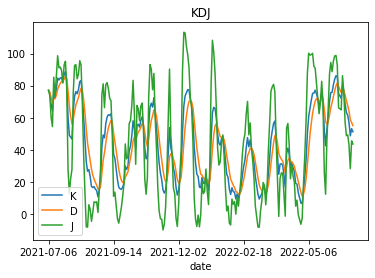

logout success!


In [107]:
if __name__ == '__main__':
 code = 'sh.601100'
 startdate = '2021-06-24'
 enddate = '2022-06-24'
 df = computeKDJ(code, startdate, enddate)
 # 保存到文件中
 df.to_csv("Data/KDJ-%s.csv" % code, encoding='gbk')

In [16]:
df[df['KDJ_金叉死叉'] != '']

,K,D,J,KDJ_金叉死叉
date,,,,
2021-07-12,76.214998,71.683240,85.278515,金叉
2021-07-21,82.181974,82.471988,81.601947,死叉
2021-07-22,86.981640,83.982969,92.978982,金叉
2021-07-26,82.448000,84.540176,78.263649,死叉
2021-08-02,64.447104,58.882398,75.576516,金叉
2021-08-11,74.297027,76.999428,68.892226,死叉
2021-08-31,21.020414,17.261972,28.537297,金叉
2021-09-13,54.696481,57.111120,49.867204,死叉
2021-09-29,29.820144,22.901197,43.658037,金叉
